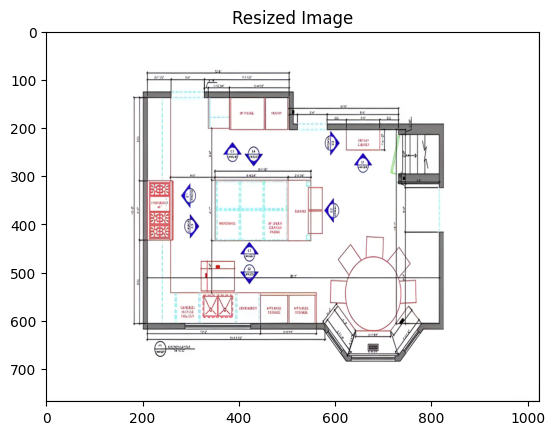

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = r"C:\Users\devvg\Downloads\sample1.png"
image = cv2.imread(image_path)

# Resize to a standard size (e.g., 1024x768)
image = cv2.resize(image, (1024, 768))

# Show the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Resized Image")
plt.show()


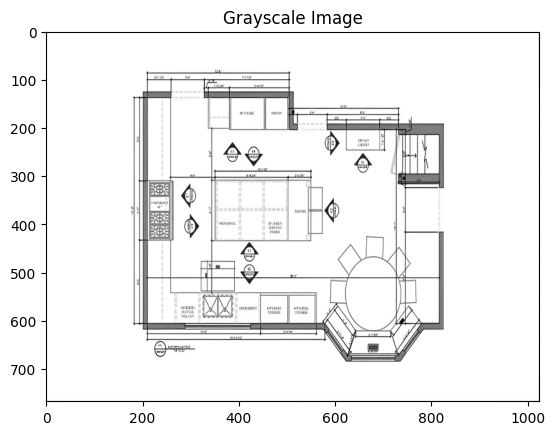

In [2]:
# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display grayscale image
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.show()


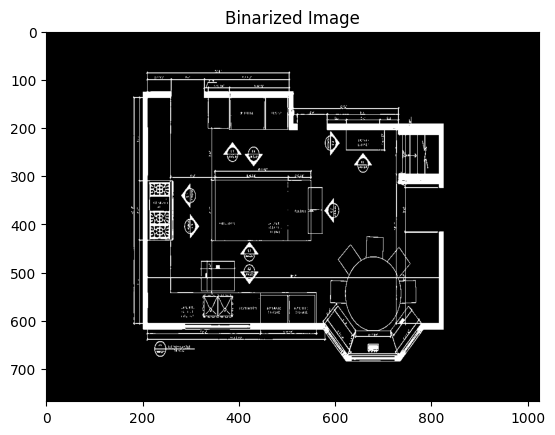

In [3]:
# Apply thresholding
_, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

# Show thresholded image
plt.imshow(binary, cmap='gray')
plt.title("Binarized Image")
plt.show()


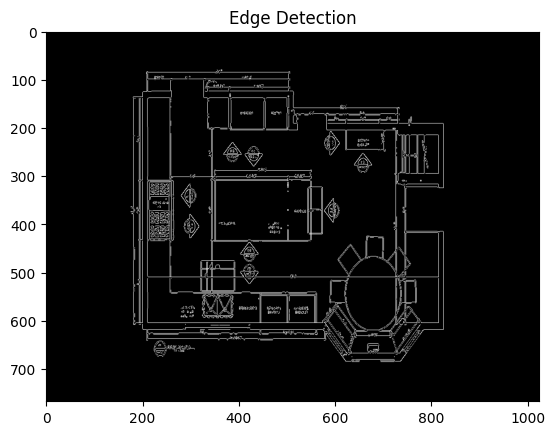

In [4]:
# Apply Canny Edge Detection
edges = cv2.Canny(binary, 50, 150)

# Display detected edges
plt.imshow(edges, cmap='gray')
plt.title("Edge Detection")
plt.show()


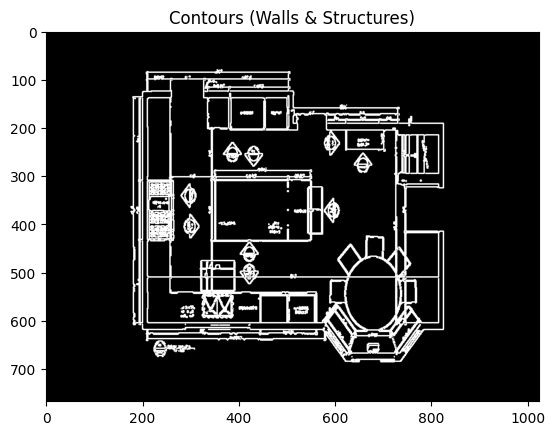

In [5]:
# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a blank canvas
contour_image = np.zeros_like(gray)

# Draw contours on the blank image
cv2.drawContours(contour_image, contours, -1, (255, 255, 255), 2)

# Show detected contours
plt.imshow(contour_image, cmap='gray')
plt.title("Contours (Walls & Structures)")
plt.show()


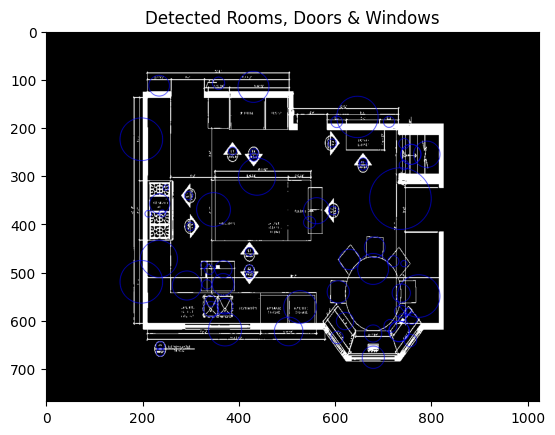

In [6]:
# Set up blob detector parameters
params = cv2.SimpleBlobDetector_Params()
params.filterByArea = True
params.minArea = 100  # Adjust as needed
params.filterByCircularity = False
params.filterByConvexity = False
params.filterByInertia = False

# Create a detector with parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs (rooms, doors, windows, furniture)
keypoints = detector.detect(binary)

# Draw detected blobs on the image
blob_image = cv2.drawKeypoints(binary, keypoints, np.array([]), (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show detected blobs
plt.imshow(blob_image, cmap='gray')
plt.title("Detected Rooms, Doors & Windows")
plt.show()


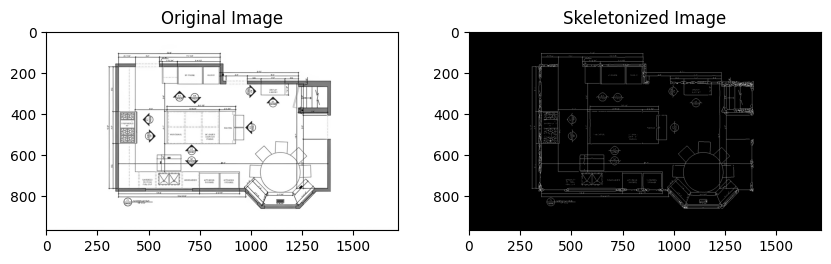

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize

# Read the image
image = cv2.imread(r"C:\Users\devvg\Downloads\sample1.png", cv2.IMREAD_GRAYSCALE)

# Convert to binary
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

# Normalize binary image (0,1) for skeletonization
binary = binary.astype(np.uint8) / 255

# Apply skeletonization
skeleton = skeletonize(binary)

# Display the result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(skeleton, cmap='gray')
plt.title("Skeletonized Image")

plt.show()


In [14]:
import json

# Convert contours to polylines
polylines = [contour[:, 0, :].tolist() for contour in contours]

# Save vector representation as JSON
vector_data = {"polylines": polylines}

with open(r"C:\Users\devvg\Downloads\sample1.png", "w") as f:
    json.dump(vector_data, f)

print("Vector representation saved as vector_data.json")


Vector representation saved as vector_data.json


In [18]:
import trimesh

# Define depth parameters
wall_height = 100  # Height of walls in 3D

# Convert contours to 3D points
vertices = []
faces = []

for polyline in polylines:
    for x, y in polyline:
        vertices.append([x, y, 0])  # Bottom
        vertices.append([x, y, wall_height])  # Top

# Create faces for walls
for i in range(0, len(vertices) - 2, 2):
    faces.append([i, i + 1, i + 2])
    faces.append([i + 1, i + 2, i + 3])

# Create and save 3D mesh
mesh = trimesh.Trimesh(vertices=vertices, faces=faces)
mesh.export(r"C:\Users\devvg\Downloads\sample1.obj")  # Export as .obj


print("3D Model saved as 3d_model.obj")


3D Model saved as 3d_model.obj


In [1]:
import open3d as o3d

# Load 3D model
mesh = o3d.io.read_triangle_mesh(r"C:\Users\devvg\Downloads\sample1.obj")
mesh.compute_vertex_normals()

# Show 3D model
o3d.visualization.draw_geometries([mesh])


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[Open3D WARNING] The number of points is 0 when creating axis-aligned bounding box.
